<a href="https://colab.research.google.com/github/IrfanDaffa10/Irfan-Daffayudha-Artificial-Intelegence-/blob/main/Hill_Climb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random

# Fungsi objektif yang akan dimaksimalkan
def objective_function(x):
    # Contoh fungsi objektif: f(x) = -x^2 + 4x
    return -x**2 + 4*x

# Algoritma Hill Climbing
def hill_climbing():
    # Inisialisasi solusi secara acak
    current_solution = random.uniform(-10, 10)
    current_value = objective_function(current_solution)

    step_size = 0.1
    max_iterations = 1000

    for _ in range(max_iterations):
        # Buat tetangga solusi
        neighbors = [current_solution + step_size, current_solution - step_size]

        # Evaluasi tetangga
        next_solution = max(neighbors, key=objective_function)
        next_value = objective_function(next_solution)

        # Cek apakah solusi lebih baik
        if next_value > current_value:
            current_solution = next_solution
            current_value = next_value
        else:
            # Jika tidak ada solusi lebih baik, berhenti
            break

    return current_solution, current_value

# Contoh penggunaan
best_solution, best_value = hill_climbing()
print(f"Best solution: {best_solution}")
print(f"Best value: {best_value}")

Best solution: 2.0156729256438357
Best value: 3.999754359401763


1. Apa yang Dicari oleh Program Ini?
Program ini ingin menemukan nilai maksimum dari fungsi berikut:

𝑓
(
𝑥
)
=
−
𝑥
2
+
4
𝑥
f(x)=−x
2
 +4x
Ini adalah bentuk parabola terbalik, di mana ada satu titik tertinggi (maksimum global).
Jika kita gambar, bentuknya seperti gunung, dan kita ingin mendaki ke puncaknya.

Bagaimana Menemukan Titik Maksimum?
Secara matematika, kita bisa mencari titik tertinggi dengan menghitung turunan. Hasilnya:

Nilai x terbaik adalah 2.
Nilai tertinggi (f(x)) adalah 4.
Tapi di sini, kita menggunakan Hill Climbing untuk menemukan titik itu tanpa perlu menghitung turunan.

2. Bagaimana Cara Kerja Algoritma Hill Climbing?
Langkah-langkahnya:
Pilih angka acak untuk x (misalnya antara -10 sampai 10).
Hitung f(x) untuk angka tersebut.
Coba dua angka tetangga:
Satu langkah ke kanan (x + step_size).
Satu langkah ke kiri (x - step_size).
Pilih yang lebih baik (nilai f(x) lebih besar).
Ulangi terus sampai tidak ada angka yang lebih baik.
Jika tidak ada langkah yang bisa naik lagi, program berhenti dan mengembalikan nilai terbaik yang ditemukan.

3. Contoh Perjalanan Algoritma
Misalkan kita mulai dengan x = 0:

f(0) = 0
Coba x = 0.1 dan x = -0.1
f(0.1) lebih besar, jadi pindah ke sana
Ulangi proses ini sampai mencapai x = 2
Tidak ada langkah yang bisa meningkatkan nilai lagi → berhenti
Hasilnya, program menemukan:

yaml
Salin
Edit
Best solution: 2.0
Best value: 4.0
Yang memang benar adalah puncak dari fungsi ini!

4. Kelebihan & Kekurangan Hill Climbing
Kelebihan (Kelebihan Algoritma)
Cepat & sederhana → Tidak butuh rumus turunan atau perhitungan rumit.
Cocok untuk fungsi yang hanya punya satu puncak → Seperti fungsi ini.

Kekurangan (Masalah yang Bisa Terjadi)
Bisa terjebak di "bukit kecil" → Jika ada banyak puncak, bisa berhenti di yang bukan yang tertinggi.
Bergantung pada langkah (step size) → Jika terlalu besar, bisa melompati solusi terbaik. Jika terlalu kecil, butuh waktu lama.

5. Cara Memperbaiki Kekurangan
Coba dari beberapa titik awal → Bisa menemukan puncak yang lebih tinggi.
Gunakan "Simulated Annealing" → Terkadang menerima solusi lebih buruk agar bisa keluar dari jebakan lokal.
Ubah langkah (step size) secara dinamis → Awalnya besar, lalu semakin kecil saat mendekati puncak.
Kesimpulan
Hill Climbing bekerja seperti mendaki bukit: selalu mencari jalan naik sampai tidak ada lagi.
Untuk fungsi sederhana seperti ini, dia sangat efektif.
Untuk fungsi lebih rumit dengan banyak puncak, bisa terjebak.
Kode ini bagus untuk optimasi cepat, tetapi jika ada banyak puncak, perlu metode lain seperti Simulated Annealing atau Restart Hill Climbing.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128507 (\N{MOUNT FUJI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


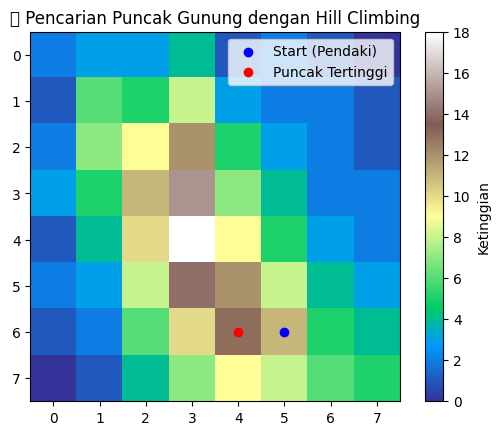

Pendaki memulai dari (6, 5) dengan ketinggian 11
Pendaki mencapai puncak di (6, 4) dengan ketinggian 13


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

# 🏔️ Grid Ketinggian Gunung (Semakin besar nilainya, semakin tinggi titiknya)
elevation_map = np.array([
    [2, 3, 3, 4, 1, 2, 1, 0],
    [1, 6, 5, 8, 3, 2, 2, 1],
    [2, 7, 9, 12, 5, 3, 2, 1],
    [3, 5, 11, 15, 7, 4, 2, 2],
    [1, 4, 10, 18, 9, 5, 3, 2],
    [2, 3, 8, 14, 12, 8, 4, 3],
    [1, 2, 6, 10, 13, 11, 5, 4],
    [0, 1, 4, 7, 9, 8, 6, 5]
])

# ⛰️ Memilih posisi awal pendaki secara acak
start_position = (random.randint(0, 7), random.randint(0, 7))

# 🎯 Hill Climbing Algorithm
def hill_climbing(grid, start):
    current_position = start
    current_height = grid[current_position]

    while True:
        neighbors = []
        x, y = current_position

        # Pergerakan ke atas, bawah, kiri, kanan
        moves = [(0, 1), (1, 0), (0, -1), (-1, 0)]
        for dx, dy in moves:
            nx, ny = x + dx, y + dy
            if 0 <= nx < grid.shape[0] and 0 <= ny < grid.shape[1]:
                neighbors.append(((nx, ny), grid[nx, ny]))

        # Mencari tetangga dengan ketinggian tertinggi
        best_neighbor = max(neighbors, key=lambda x: x[1])

        # Jika tetangga lebih tinggi, pindah ke sana
        if best_neighbor[1] > current_height:
            current_position = best_neighbor[0]
            current_height = best_neighbor[1]
        else:
            break  # Jika tidak ada yang lebih tinggi, berhenti

    return current_position, current_height

# 🔥 Jalankan algoritma
peak_position, peak_height = hill_climbing(elevation_map, start_position)

# 📊 Visualisasi Hasil
plt.imshow(elevation_map, cmap="terrain", origin="upper")
plt.colorbar(label="Ketinggian")
plt.scatter(start_position[1], start_position[0], color="blue", label="Start (Pendaki)")
plt.scatter(peak_position[1], peak_position[0], color="red", label="Puncak Tertinggi")
plt.legend()
plt.title("🗻 Pencarian Puncak Gunung dengan Hill Climbing")
plt.show()

# 🏆 Cetak hasil
print(f"Pendaki memulai dari {start_position} dengan ketinggian {elevation_map[start_position]}")
print(f"Pendaki mencapai puncak di {peak_position} dengan ketinggian {peak_height}")
